In [1]:
import sys

sys.version

'3.9.2 (default, Feb 28 2021, 17:03:44) \n[GCC 10.2.1 20210110]'

In [2]:
!pip list| grep scikit

scikit-learn              1.5.0


### Typical ML Workflow

1. Asking the right question
2. Preparing data
3. Selecting the algorithm
4. Training the model
5. Testing the model

### Asking the right question.

Question should have "direction" and "validation" criteria.

"Predict if a person will develop diabetes?" 

#### Solution Goals.

1. Scope (including data sources) (age, race, weight, genetic factors, etc.,)
Modified question *"Using Pima Indian Diabetes data, predict if a person will develop diabetes."

2. Target performance required (Binary result true/false, 70% or greater accuracy.)
Modified question *"Using Pima Indian Diabetes data, predict with 70% or greater accuracy, predict if a person will develop diabetes."

3. Context & usage (likelyhood? or anything else)
Modified question *"Using Pima Indian Diabetes data, predict with 70% or greater accuracy, which people are likely to develop diabetes."

4. How solution will be created
Modified question *"Use the Machine Learning Workflow to process and transofrm Pima Indian Diabetes data to create a prediction model. This model must predict which people are likely to develop diabetes, with 70% or greater accuracy."*

### Get, Clean, Explore, make Tidy data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("./data/pima-data.csv")

In [5]:
df.shape

(768, 10)

In [6]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

### Feature vs. Column

## nulls, no data, unused data & duplicate data
## ID columns, duplicated features such as AreaInSQFT and AreaInMeters, correlated Features 

In [7]:
df.isnull().values.any()

False

In [8]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    # how to add legends?
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

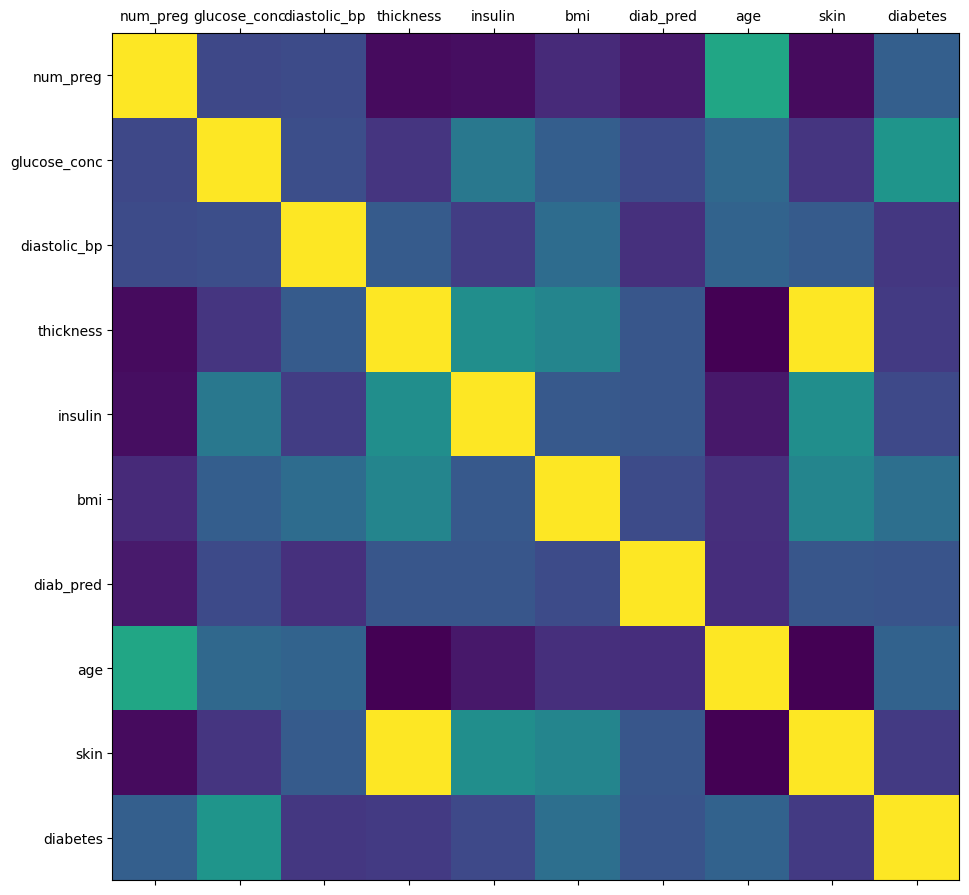

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
del df['skin']

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


### change True/False to numeric values.

In [13]:
diabetes_map = { True: 1, False: 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
(f"({num_true * 100/(num_true + num_false):0.2f}%, {num_false * 100/(num_true + num_false):0.2f}%)")

'(34.90%, 65.10%)'

In [16]:
df.shape

(768, 9)

|Learning Type|Result Type|Complexity|Basic vs. Enhanced|
|--------------|-----------|----------|------------------|
|Supervised|Binary (True/False)|simple. not Ensemble algos| basic.|


Ensemble
1. Container alogs
2. Multiple child alogs
3. Boost performance

| Naive Bayes | Logistic Regression | Decision Tree |
|-----------|-------------------|-------------|
| yes|no |no |

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
feature_columns = list(df.columns)
feature_columns.remove('diabetes')
predicated_class_names = 'diabetes'

(feature_columns, predicated_class_names)

(['num_preg',
  'glucose_conc',
  'diastolic_bp',
  'thickness',
  'insulin',
  'bmi',
  'diab_pred',
  'age'],
 'diabetes')

In [19]:
X = df[feature_columns].values
y = df[predicated_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [20]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((537, 8), (231, 8), (537,), (231,))

training_true vs. training_false and testing_true vs. testing_false

missing values

In [21]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df["glucose_conc"] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df["diastolic_bp"] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df["thickness"] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df["insulin"] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df["bmi"] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df["diab_pred"] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df["age"] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [22]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [24]:
def print_performance(y, predictedX):
    print("Confusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y, predictedX)))
    print("")

    print("Classification Report:")
    print("{0}".format(metrics.classification_report(y, predictedX)))
    print("")

In [25]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

print_performance(y_train, nb_predict_train)

Accuracy: 0.7542
Confusion Matrix:
[[293  56]
 [ 76 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       349
           1       0.67      0.60      0.63       188

    accuracy                           0.75       537
   macro avg       0.73      0.72      0.72       537
weighted avg       0.75      0.75      0.75       537




In [26]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

print_performance(y_test, nb_predict_test)

Accuracy: 0.7359
Confusion Matrix:
[[118  33]
 [ 28  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231




1. Adjust current algo
2. Get more data/improve the data
3. Improve training (adjust hyper parameters of current algo)
4. Switch algo

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [28]:
rf_predict_train = rf_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

print_performance(y_train, rf_predict_train)

Accuracy: 1.0000
Confusion Matrix:
[[349   0]
 [  0 188]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537




In [29]:
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

print_performance(y_test, rf_predict_test)

Accuracy: 0.7403
Confusion Matrix:
[[119  32]
 [ 28  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231




In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=400)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=400, random_state=42)

In [31]:
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print_performance(y_test, lr_predict_test)

Accuracy: 0.7359
Confusion Matrix:
[[123  28]
 [ 33  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231




In [32]:
from sklearn.linear_model import LogisticRegressionCV

lrcv_model = LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, Cs=3, refit=False, class_weight="balanced", solver='lbfgs', max_iter=400)
lrcv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=400,
                     n_jobs=-1, random_state=42, refit=False)

In [33]:
lrcv_predict_train = lrcv_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lrcv_predict_train)))

print_performance(y_train, lrcv_predict_train)

Accuracy: 0.7654
Confusion Matrix:
[[275  74]
 [ 52 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       349
           1       0.65      0.72      0.68       188

    accuracy                           0.77       537
   macro avg       0.74      0.76      0.75       537
weighted avg       0.77      0.77      0.77       537




In [34]:
lrcv_predict_test = lrcv_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lrcv_predict_test)))

print_performance(y_test, lrcv_predict_test)

Accuracy: 0.7013
Confusion Matrix:
[[109  42]
 [ 27  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231




In [41]:
Xp = X_test[0]

(lrcv_model.predict(Xp.reshape(1, -1)), y_test[0])

(array([0]), 0)

In [40]:
(Xp.shape, Xp.reshape(1, -1).shape)

((8,), (1, 8))